<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação 
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever a espécie do penguin (**species**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [85]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
import graphviz
from sklearn import tree

In [70]:
penguim = sns.load_dataset('penguins')
variavel_resposta = ['species']

In [71]:
penguim.head(25)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### **1.1. Análise exploratória** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos numéricos por espécie:

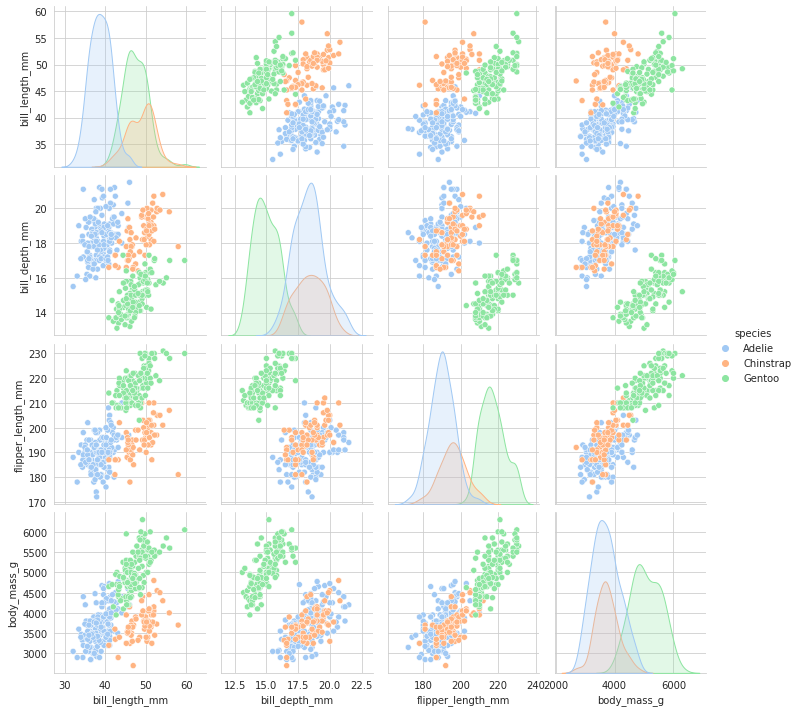

In [72]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

**Comentário:** a espécie Gentoo é a que mais se diferencia das outras. Possui maiores massa e barbatana. As espécies Adelie e Chinstrap são mais parecidas fisicamente.

 - Sexo por espécie:

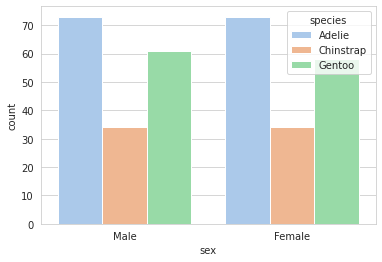

In [73]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='sex', hue="species", palette="pastel")

**Comentário:** Os conjuntos de dados estão bem distribuídos entre os sexos das 3 espécies, existindo mais ou menos a mesma quantidade de indivíduos de cada sexo.

 - Ilha por espécie:

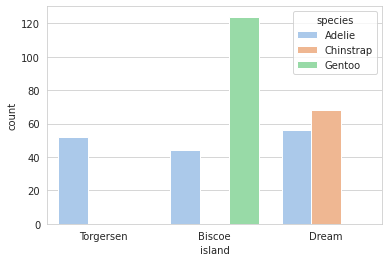

In [74]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='island', hue="species", palette="pastel")

**Comentário:** Não há um distribuição uniforme de espécies entre as ilhas.

Na ilha Torgersen, existem apenas pinguins da espécie Adelie.

Na ilha Biscoe, não há nenhum pinguim da espécie Chinstrap e há muito mais da espécie Gentoo do que da Adelie.

Na ilha Dream, não há nenhum pinguim da espécie Gentoo e a distribuição entre as espécies Chinstrap e Adelie está mais ou menos equivalente.

## 2\. Dados 

### **2.1. Valores nulos** 

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [75]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [76]:
# resposta da questão 2.1
penguim.dropna(subset=['sex'], inplace=True)
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [77]:
penguim_original = penguim.copy()
penguim_original.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### **2.2. Variáveis categóricas** 

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

In [78]:
variaveis_categoricas = penguim.select_dtypes('object').columns.drop(variavel_resposta)
variaveis_categoricas

Index(['island', 'sex'], dtype='object')

In [79]:
# resposta da questão 2.2
for coluna in variaveis_categoricas:
    itens = penguim[coluna].drop_duplicates()
    for item in itens:
        penguim[f'{coluna}_{item}_nom'] = penguim[coluna].apply(lambda caractere: 1 if caractere == item else 0)

penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Torgersen_nom,island_Biscoe_nom,island_Dream_nom,sex_Male_nom,sex_Female_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1,0,0,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1,0,0,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1,0,0,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1,0,0,1,0


### **2.3. Limpeza** 

Descarte as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe. 

In [80]:
# resposta da questão 2.3
print(f'Depois das transformações, a base de dados ficou com {len(penguim.columns)} colunas.')
penguim.drop(columns=variaveis_categoricas, inplace=True)
print(f'Depois da descartar as colunas categóricas, a base de dados ficou com {len(penguim.columns)} colunas.')
penguim.head()

Depois das transformações, a base de dados ficou com 12 colunas.
Depois da descartar as colunas categóricas, a base de dados ficou com 10 colunas.


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Torgersen_nom,island_Biscoe_nom,island_Dream_nom,sex_Male_nom,sex_Female_nom
0,Adelie,39.1,18.7,181.0,3750.0,1,0,0,1,0
1,Adelie,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,1,0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,1,0,0,1,0


### **2.4. Treino/Teste** 

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes. 

In [81]:
# resposta da questão 2.4
predictors_train, predictors_test, target_train, target_test = train_test_split(
    penguim.drop(variavel_resposta, axis=1),
    penguim[variavel_resposta],
    test_size=.25,
    random_state=123
)

In [82]:
print(penguim.shape)
print(predictors_train.shape)
print(predictors_test.shape)
print(target_train.shape)
print(target_test.shape)

(333, 10)
(249, 9)
(84, 9)
(249, 1)
(84, 1)


## 3\. Modelagem 

### **3.1. Treino** 

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

**Resposta:** ?

In [87]:
# resposta da questão 3.1
model = model.fit(predictors_train,target_train)
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
        'body_mass_g', 'island_Torgersen_nom', 'island_Biscoe_nom',
        'island_Dream_nom', 'sex_Male_nom', 'sex_Female_nom'], dtype=object),
 'n_features_in_': 9,
 'n_outputs_': 1,
 'classes_': array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 'n_classes_': 3,
 'max_features_': 9,
 'tree_': <sklearn.tree._tree.Tree at 0x16d9fc260>}

In [88]:
tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)
graph 

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

### **3.2. Avaliação** 

**a.** Matriz de Confusão 

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

**Comentário:** ?

In [ ]:
# resposta da questão 3.2.a

**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui uma acurácia de approx. 96% (sua acurácia pode não ser igual).

In [ ]:
# resposta da questão 3.2.b

## 4\. Predição  

### **4.1. Novo penguim** 

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

> **Nota:** Como referência eu obtive **adelie** como espécie predita (a sua predição pode não ser igual).

In [ ]:
# resposta da questão 4.1

---